### Setup

In [181]:
%reload_ext autoreload
%autoreload 2

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [183]:
systematic_review_data = pd.read_excel("data/Systematic_review.xlsx")[['Author', 'Document title', 'Abstract', 'Year', 'Original scale name', 'Category', 'Item content']]
systematic_review_data.head()


,Author,Document title,Abstract,Year,Original scale name,Category,Item content
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,women have the right to compete with men in ev...
1,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,perceived level of commitment to the women's m...,feminism,i would be willing to participate in local com...
2,"Lee, Dong Yul;Gee, Angela;Uhlemann, Max R.",Perception of clients' presenting concern as a...,The present study asked the following question...,2000,attitudes toward feminism and the women's move...,feminism,the leaders of the women’s movement may be ext...
3,"Murphy, L., Rollins, J.H.",Attitudes toward women in co-ed and all female...,NaN,1980,attitudes toward woman scale (AWS),feminism,swearing and obscenity are more repulsive in t...
4,"Nadeem, F., Khalid, R.",The relationship of gender role attitudes with...,NaN,2018,attitudes toward woman scale (AWS),feminism,swearing and obscenity in the speech of a man ...


In [184]:
items_df = systematic_review_data.dropna(subset='Item content')[['Author', 'Document title', 'Abstract', 'Year', 'Original scale name', 'Category', 'Item content']]

items_df["Item content"] = items_df["Item content"].apply(lambda x: [i.strip() for i in str(x).split("//")])
items_df =  items_df.explode('Item content')

items_df.sample(10)

,Author,Document title,Abstract,Year,Original scale name,Category,Item content
1293,"Pandey, Janak;Sinha, Yoganand;Prakash, Anand;T...",Rightâ€“Left political ideologies and attribut...,"30 right-, 30 left-wing, and 30 politically ne...",1982,new left scale,ideology,“the establishment” unfairly controls every as...
967,"BRANSCOMBE, NR; DEAUX, K",FEMINIST ATTITUDE ACCESSIBILITY AND BEHAVIORAL...,NaN,1991,FEM scale,feminism,a woman should be expected to change her name ...
2743,"Glasford, Demis E.",The privileged liberal principleâ€implementat...,Much of the work on the development and mainte...,2022,political self-categorization,political orientation,i often think about the fact that i am politic...
1067,"Zucker, Alyssa N.",Disavowing social identities: What it means wh...,"Many women, even as they embrace feminist prin...",2004,NaN,feminism,i am proud to be a competent woman
1074,"Rader, Jill;Gilbert, Lucia Albino",The egalitarian relationship in feminist therapy.,Feminist therapy has revolutionized clinical p...,2005,,feminism,replacing the word “god with “goddess” will re...
75,"COTA, AA; XINARIS, S",FACTOR STRUCTURE OF THE SEX-ROLE IDEOLOGY SCAL...,We examined the factor structure of the Sex-Ro...,1993,sex role ideology scale,feminism,a woman who dislikes her children is abnormal
490,"Myers, Taryn A.;Crowther, Janis H.","Sociocultural pressures, thin-ideal internaliz...",Theory and research suggest that sociocultural...,2007,,feminism,rape is ultimately a powerful tool that keeps ...
1293,"Pandey, Janak;Sinha, Yoganand;Prakash, Anand;T...",Rightâ€“Left political ideologies and attribut...,"30 right-, 30 left-wing, and 30 politically ne...",1982,new left scale,ideology,a social scientist should not separate his pol...
315,"Smith, A.G., Winter, D.G.","Right-wing authoritarianism, party identificat...",NaN,2002,attitudes toward feminism and the women's move...,feminism,there are better ways for women to fight for e...
1613,"Tetlock, Philip E.",Accountability and complexity of thought.,Explored the impact of accountability (the nee...,1983,new left scale,ideology,groups with a formal structure tend to stifle ...


### Tokenization

In [185]:
from modules.utils import preprocess_keep_or_exclude_pos


items_df['tokens'] = items_df['Item content'].apply(lambda s: preprocess_keep_or_exclude_pos(s))

items_df['tokens_nouns'] = items_df['Item content'].apply(lambda s: preprocess_keep_or_exclude_pos(
    s,
    keep_pos={"NOUN","PROPN", "ADJ"}
))

items_df['tokens_nouns__unique'] = items_df['tokens_nouns'].apply(lambda s: ' '.join(list(set(s))))


In [186]:
items_df.sample(10)

,Author,Document title,Abstract,Year,Original scale name,Category,Item content,tokens,tokens_nouns,tokens_nouns__unique
1526,"Duncan, Lauren E.;Mincer, Elizabeth;Dunn, Sara...",Assessing politicized sexual orientation ident...,Building on psychological theories of motivati...,2017,operational ideology,ideology,crime/neighborhood watch,"[crime, neighborhood, watch]","[crime, neighborhood, watch]",crime neighborhood watch
1309,"Dittmar, H., Dickinson, J.",The perceived relationship between the belief ...,NaN,1993,new left scale,ideology,we must strive for the democratization of deci...,"[must, strive, democratization, decision, make...","[democratization, decision, body, government]",democratization decision government body
999,"Henley, Nancy M.;Spalding, Leah R.;Kosta, Andrea",Development of the short form of the Feminist ...,Development and testing of a 36-item version o...,2000,,feminism,i have read nonexploitative erotica written fr...,"[read, nonexploitative, erotica, write, woman,...","[nonexploitative, erotica, woman, point, view]",woman point erotica nonexploitative view
391,"Damji, T., Lee, C.M.",Gender role identity and perceptions of ismail...,In the present author's (see record 1983-03483...,1995,attitudes toward woman scale (AWS),feminism,"in general, the father should have greater aut...","[general, father, great, authority, mother, br...","[general, father, great, authority, mother, br...",mother great father authority bringing general...
462,"Kamke, Kristyn;Widman, Laura;Javidi, Hannah",The multidimensionality of adolescent girlsâ€™...,Many adolescents hold positive attitudes towar...,2022,attitudes toward woman scale (AWS),feminism,"if both husband and wife have jobs, the husban...","[husband, wife, job, husband, share, housework...","[husband, wife, job, husband, share, housework...",laundry wife job husband dish housework share
1356,"Kashima, Yoshihisa;Paladino, Angela;Margetts, ...",Environmentalist identity and environmental st...,Environmental identity has emerged as a motiva...,2014,NaN,ideology,it's old-fashioned and wrong to think that one...,"[old, fashioned, wrong, think, one, culture, s...","[old, fashioned, wrong, culture, set, value, w...",old world wrong culture set fashioned well way...
1339,"Fraley, R. Chris;Griffin, Brian N.;Belsky, Jay...",Developmental antecedents of political ideolog...,The study reported here examined the developme...,2012,wilson-patterson conservatism scale,ideology,living together,"[live, together]",[],
1140,"Barber, M.E., Foley, L.A., Jones, R.",Evaluations of aggressive women: The effects o...,NaN,1999,attitudes toward woman scale (AWS),feminism,women should assume their rightful place in bu...,"[woman, assume, rightful, place, business, pro...","[woman, rightful, place, business, profession,...",woman business rightful place man profession
3369,"Gibbon, E., Douglas, H.E.",Personality and the pro-environmental individu...,NaN,2021,the new ecological paradigm,environmentalism,the earth has plenty of natural resources if w...,"[earth, plenty, natural, resource, learn, deve...","[earth, plenty, natural, resource]",plenty earth natural resource
1001,"Henley, Nancy M.;Spalding, Leah R.;Kosta, Andrea",Development of the short form of the Feminist ...,Development and testing of a 36-item version o...,2000,,feminism,it is a man’s right and duty to maintain order...,"[man, right, duty, maintain, order, family, me...","[man, right, duty, order, family, necessary]",duty family necessary right man order


### Deduplication

In [187]:
items_df_ = items_df.copy()

In [215]:
from modules.deduplication import dedupe_and_map_versions

# 1) Dedup by exact Item content
dedup_by_content, map_content = dedupe_and_map_versions(items_df_, subset="Item content")
print(len(items_df_))
print(len(dedup_by_content))

# 2) Dedup by tokens but keep the mapping of all Item-content variants
dedup_by_tokens, map_tokens = dedupe_and_map_versions(items_df_, subset="tokens_nouns__unique")
print(len(dedup_by_tokens))

# Example: see all text variants for one representative row
some_rep_text = dedup_by_tokens.iloc[1]["Item content"]

map_tokens[some_rep_text]  # -> list of original "Item content" versions for that group


/Users/ezequiellopez/_research_projects/__summer/left_items_review/modules/deduplication.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  


19809
5207
4500


/Users/ezequiellopez/_research_projects/__summer/left_items_review/modules/deduplication.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  


[['as head of the household, the father should have final authority over his children',
  'as head of the household the father should have final authority over his children',
  'as head of the household the father should have final authority over the children',
  'as head of the household, the father should have final authority over his children (r)',
  'As head of the household, the father should have final authority over his children',
  'as head of the household, the father should have the final authority over his children']]

In [216]:

items_df = dedup_by_tokens

### Embeddings

In [163]:
from modules.embeddings import get_embedding

In [ ]:
# items_df['qwen_embeddings'] = items_df['tokens_nouns__unique'].apply(lambda s: get_embedding(s))


In [ ]:

# items_df['qwen_embeddings_raw'] = items_df['Item content'].apply(lambda s: get_embedding(s))

In [ ]:
# items_df.to_pickle('items_df.pkl')


In [164]:
items_df_ = pd.read_pickle('data/items_df.pkl')


In [165]:
items_df = items_df.merge(
    items_df_[['Item content', 'qwen_embeddings', 'qwen_embeddings_raw']],
    on='Item content',
    how='left'
)
items_df.sample(10)

,Author,Document title,Abstract,Year,Original scale name,Category,Item content,tokens,tokens_nouns,tokens_nouns__unique,Item content__versions,qwen_embeddings,qwen_embeddings_raw
647,"Cole, E.R., Zucker, A.N., Ostrove, J.M.",Political participation and feminist conscious...,NaN,1998,system blame,feminism,"if women don't advance in their jobs, it is be...","[woman, advance, job, barrier, keep, get, ahead]","[woman, advance, job, barrier]",woman advance barrier job,"[if women don't advance in their jobs, it is b...","[0.31429633498191833, -1.9056636095046997, 4.3...","[1.3691537380218506, 1.160462737083435, -0.202..."
16,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,women are basically more unpredictable than men,"[woman, basically, unpredictable, man]","[woman, unpredictable, man]",woman unpredictable man,[women are basically more unpredictable than men],"[3.3087921142578125, -0.6790547370910645, 1.13...","[1.0804436206817627, 0.23615354299545288, 1.15..."
3172,"Li, Heng;Cao, Yu",Time for politics: The relationship between po...,Temporal Focus Hypothesis (TFH) proposes that ...,2022,political ideology,political orientation,social political ideology,"[social, political, ideology]","[social, political, ideology]",political social ideology,[social political ideology],"[1.0126347541809082, 2.885105609893799, 0.0210...","[2.308046817779541, 1.4726711511611938, 0.1749..."
1570,"Weissflog, Meghan;Choma, Becky L.;Dywan, Jane;...",The political (and physiological) divide: Poli...,Our goal was to test a model of sociopolitical...,2013,Egalitarianism and Inegalitarianism Scale,egalitarianism,incomes should not be more equal since the ric...,"[income, equal, rich, invest, economy, create,...","[income, equal, rich, invest, economy, job, be...",income economy job benefit equal rich invest,[incomes should not be more equal since the ri...,"[2.6702897548675537, 3.498811721801758, -1.155...","[1.017179012298584, 0.9802508354187012, -0.724..."
997,"Elmore, Patricia B.;Vasu, Ellen S.",A model of statistics achievement using spatia...,Examined the importance of spatial ability (Ki...,1986,,feminism,care of children should be shared equally by b...,"[care, child, share, equally, spouse]","[care, child, spouse]",spouse child care,[care of children should be shared equally by ...,"[1.1014578342437744, 1.0711586475372314, 0.175...","[0.9463796615600586, 0.41985926032066345, 0.26..."
2929,"Costello, R.",The ideological space in Irish politics: compa...,This research investigated the associations be...,2017,operational ideology,ideology,"no, current subsidies for childcare are adequate","[current, subsidy, childcare, adequate]","[current, subsidy, childcare, adequate]",childcare subsidy adequate current,"[no, current subsidies for childcare are adequ...","[2.726999282836914, 2.483750343322754, -0.6027...","[0.1387328952550888, -0.5257453918457031, 0.68..."
3574,"Milfont, Taciano L.;Duckitt, John",The Environmental Attitudes Inventory: A valid...,"Environmental attitudes (EA), a crucial constr...",2010,NaN,environmentalism,i don’t get upset at the idea of forests being...,"[get, upset, idea, forest, clear, agriculture]","[upset, idea, forest, agriculture]",idea upset agriculture forest,[i don’t get upset at the idea of forests bein...,"[3.0925889015197754, 1.131181001663208, 1.8556...","[3.406874418258667, 2.4086854457855225, 2.1492..."
3014,"Proulx, T., Costin, V., Magazin, E., Zarzeczna...",The Progressive Values Scale: Assessing the Id...,NaN,2022,left-wing authoritarianism scale (conway et al),left-wing authoritarianism,you have to admire those who challenged the la...,"[admire, challenge, law, majority, view, prote...","[law, majority, view, abortion, right, favor, ...",right law majority abortion favor school praye...,[you have to admire those who challenged the l...,"[3.05029296875, 3.417377471923828, 0.445583134...","[0.13

### Similarity

In [166]:
items_df

,Author,Document title,Abstract,Year,Original scale name,Category,Item content,tokens,tokens_nouns,tokens_nouns__unique,Item content__versions,qwen_embeddings,qwen_embeddings_raw
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,women have the right to compete with men in ev...,"[woman, right, compete, man, sphere, activity]","[woman, right, man, sphere, activity]",woman sphere right activity man,[women have the right to compete with men in e...,"[5.537450790405273, 1.9330693483352661, -2.597...","[0.8717906475067139, 2.3683886528015137, 0.015..."
1,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,"as head of the household, the father should ha...","[head, household, father, final, authority, ch...","[head, household, father, final, authority, ch...",household father authority head child final,"[as head of the household, the father should h...","[3.0980119705200195, 1.6093477010726929, 0.700...","[2.6022112369537354, 0.002913000527769327, 1.8..."
2,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,the unmarried mother is morally a greater fail...,"[unmarried, mother, morally, great, failure, u...","[unmarried, mother, great, failure, unmarried,...",mother failure great father unmarried,[the unmarried mother is morally a greater fai...,"[1.838101863861084, 4.485133647918701, -1.8118...","[2.813599109649658, 1.590532898902893, 0.45868..."
3,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to give up her job to move...,"[woman, refuse, give, job, move, husband, woul...","[woman, job, husband, marriage]",woman marriage husband job,[a woman who refuses to give up her job to mov...,"[3.1510119438171387, 2.8126323223114014, 2.854...","[0.4250686466693878, 0.8295471668243408, -0.04..."
4,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to bear children has faile...,"[woman, refuse, bear, child, fail, duty, husband]","[woman, child, duty, husband]",woman husband duty child,[a woman who refuses to bear children has fail...,"[4.0924506187438965, 0.9961591958999634, 1.262...","[1.5195868015289307, 0.43857425451278687, 3.62..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,"Proulx, T., Costin, V., Magazin, E., Zarzeczna...",The Progressive Values Scale: Assessing the Id...,NaN,2022,NaN,Progressivism,"if you’re part of a historical majority, it’s ...","[part, historical, majority, disrespectful, ad...","[part, historical, majority, disrespectful, cu...",group custom majority disrespectful culture pa...,"[if you’re part of a historical majority, it’s...","[0.6151881217956543, 2.360611915588379, -1.673...","[3.5421886444091797, 2.046027660369873, -0.365..."
4496,"Proulx, T., Costin, V., Magazin, E., Zarzeczna...",The Progressive Values Scale: Assessing the Id...,NaN,2022,NaN,Progressivism,taking on the culture of minority groups (musi...,"[take, culture, minority, group, music, fashio...","[culture, minority, group, music, fashion, act...",group entitlement fashion music culture act mi...,[taking on the culture of minority groups (mus...,"[2.281083583831787, 4.9683990478515625, 1.6411...","[1.3415967226028442, 1.769961953163147, 2.3607..."
4497,"Proulx, T., Costin, V., Magazin, E., Zarzeczna...",The Progressive Values Scale: Assessing the Id...,NaN,2022,NaN,Progressivism,those who have crossed a moral line can better...,"[cross, moral, line, well, understand, magnitu...","[moral, line, magn

In [168]:
from modules.similarity import find_similar_groups


In [169]:
print(items_df['qwen_embeddings_raw'].apply(type).value_counts())

# 1) Convert list‐ or tensor‐like entries into np.ndarray, leave np.ndarray alone:
def _ensure_ndarray(x):
    # if it’s already a NumPy array, keep it
    if isinstance(x, np.ndarray):
        return x
    # if it’s a list or tuple, convert to array
    if isinstance(x, (list, tuple)):
        return np.array(x)
    # if it’s a PyTorch tensor
    try:
        import torch
        if isinstance(x, torch.Tensor):
            return x.cpu().numpy()
    except ImportError:
        pass
    # else give up
    return None

items_df['qwen_embeddings_raw'] = (
    items_df['qwen_embeddings_raw']
       .apply(_ensure_ndarray)
)

# 2) Now re‐run the neighbor‐group finder
nbrs_df, groups = find_similar_groups(
    items_df,
    embedding_col='qwen_embeddings_raw',
    n_neighbors=5,
    similarity_threshold=0.,
    metric='cosine'
)

# 3) Attach back (any rows that really had no usable embedding will get NaN)
items_df['group'] = groups

qwen_embeddings_raw
<class 'list'>     4498
<class 'float'>       2
Name: count, dtype: int64


/Users/ezequiellopez/_research_projects/__summer/left_items_review/modules/similarity.py:125: UserWarning: Pruned 0 edges below sim 0.0
  warnings.warn(f"Pruned {before-after} edges below sim {similarity_threshold}")


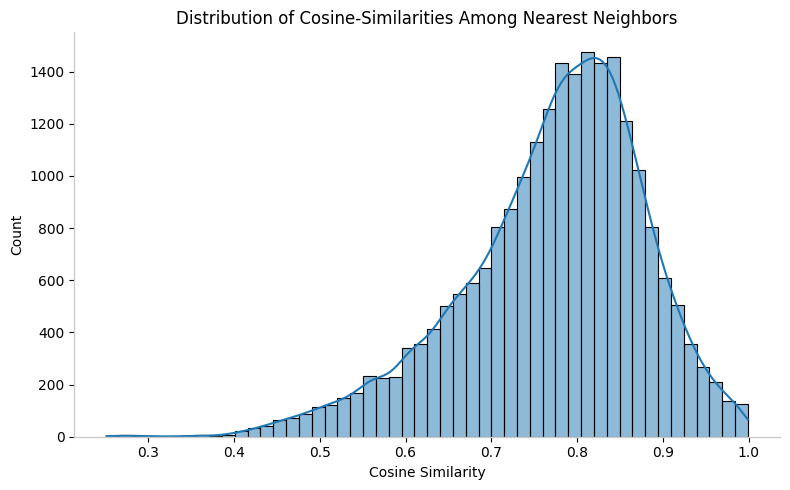

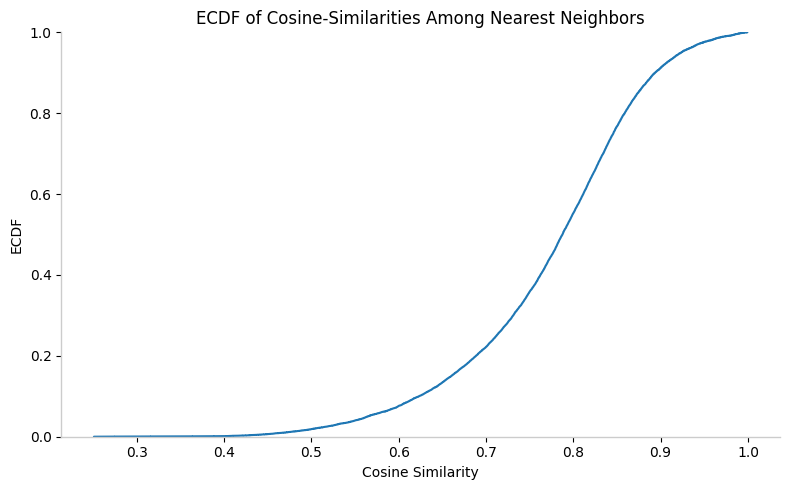

In [170]:
# How do similarities look like?
sims = nbrs_df['similarity']

plt.figure(figsize=(8, 5))
sns.histplot(sims, bins=50, kde=True)
plt.title('Distribution of Cosine-Similarities Among Nearest Neighbors')
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.ecdfplot(sims)
plt.title('ECDF of Cosine-Similarities Among Nearest Neighbors')
plt.xlabel('Cosine Similarity')
plt.ylabel('ECDF')
plt.tight_layout()
plt.show()

In [19]:
highly_similar = nbrs_df.query('similarity >= .99').sort_values('similarity', ascending=False)
highly_similar

,index,content,neighbor_index,neighbor_content,similarity
21640,4331,i feel that i have roots to a particular geogr...,3329,i feel that i have roots to a particular geogr...,0.999305
16630,3329,i feel that i have roots to a particular geogr...,4331,i feel that i have roots to a particular geogr...,0.999305
15020,3006,it’s always better to trust the judgment of th...,3098,it’s always better to trust the judgment of th...,0.998974
15480,3098,it’s always better to trust the judgment of th...,3006,it’s always better to trust the judgment of th...,0.998974
1890,379,an employed woman can establish as warm and se...,1239,an employed woman can establish as warm and se...,0.998103
...,...,...,...,...,...
2715,544,the fact that i am a feminist is an important ...,605,being a feminist is an important part of my id...,0.990429
18800,3763,"in order to protect the environment, we all sh...",3412,"to protect the environment, we should all be w...",0.990268
17045,3412,"to protect the environment, we should all be w...",3763,"in order to protect the environment, we all sh...",0.990268
4055,812,a feminist believes that antigay and racist pr...,519,antigay and racist prejudice act together to m...,0.990194


In [ ]:
# deduplicate
from modules.similarity import deduplicate_items

items_df = deduplicate_items(items_df, highly_similar)

near-duplicate groups: 29 | dropped rows: 31


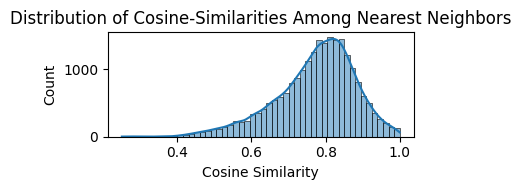

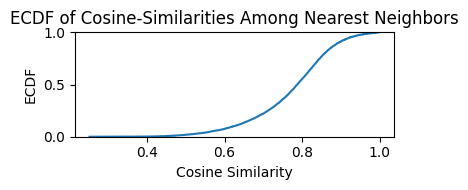

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pull out your similarity scores
sims = nbrs_df['similarity']

# 1) Histogram + KDE
plt.figure(figsize=(4, 2))
sns.histplot(sims, bins=50, kde=True)
plt.title('Distribution of Cosine-Similarities Among Nearest Neighbors')
plt.xlabel('Cosine Similarity')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2) ECDF plot
plt.figure(figsize=(4, 2))
sns.ecdfplot(sims)
plt.title('ECDF of Cosine-Similarities Among Nearest Neighbors')
plt.xlabel('Cosine Similarity')
plt.ylabel('ECDF')
plt.tight_layout()
plt.show()

### Clustering

In [22]:
emb_col = 'qwen_embeddings'
emb_col = 'qwen_embeddings_raw'

In [23]:
items_df['Category'] = items_df['Category'].apply(lambda s: s.lower())

/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


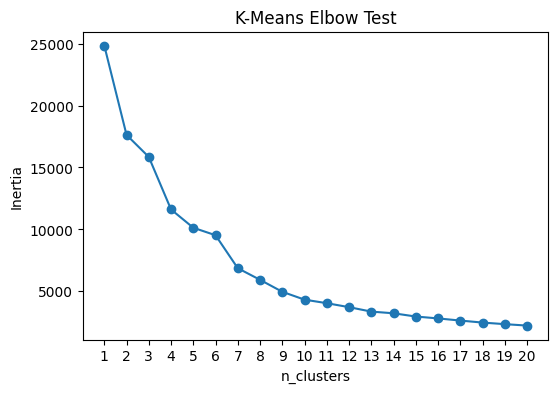

Clustering metrics:
 • Silhouette Score:        0.288
 • Calinski–Harabasz Score: 1427.7
 • Davies–Bouldin Score:    0.922


/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


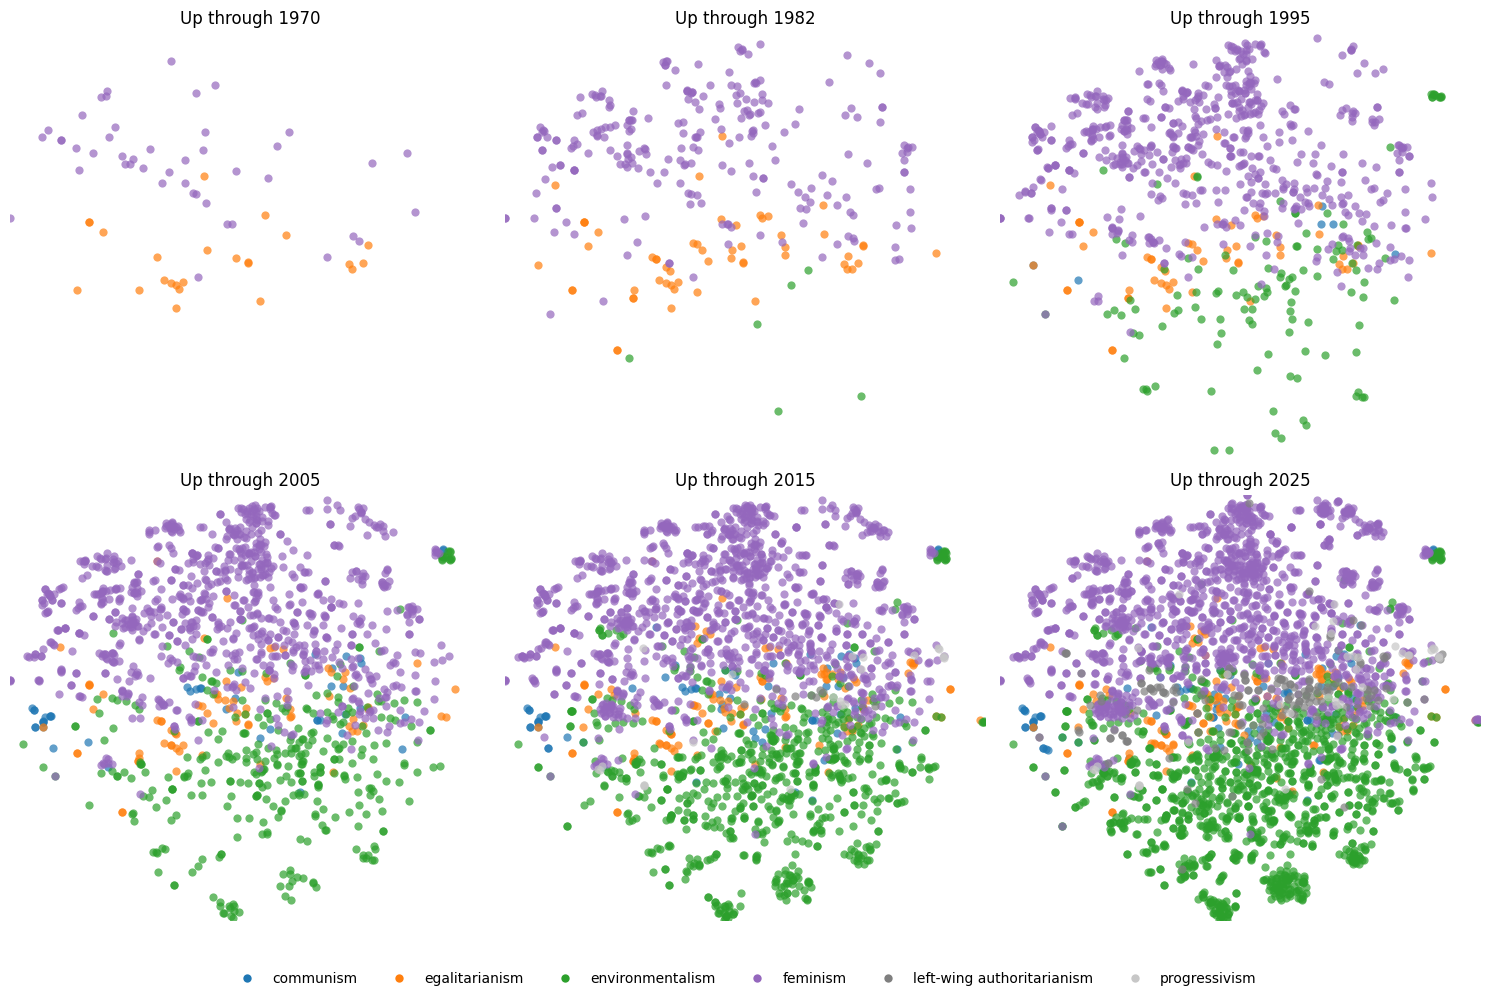

,Author,Document title,Abstract,Year,Original scale name,Category,Item content,tokens,tokens_nouns,tokens_nouns__unique,qwen_embeddings,qwen_embeddings_raw,group,cluster,dim1,dim2
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,women have the right to compete with men in ev...,"[woman, right, compete, man, sphere, activity]","[woman, right, man, sphere, activity]",woman sphere right activity man,"[5.537450790405273, 1.9330693483352661, -2.597...","[0.8717906475067139, 2.3683886528015137, 0.015...",0.0,2,-4.831566,30.967915
1,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,"as head of the household, the father should ha...","[head, household, father, final, authority, ch...","[head, household, father, final, authority, ch...",household father authority head child final,"[3.0980119705200195, 1.6093477010726929, 0.700...","[2.6022112369537354, 0.002913000527769327, 1.8...",0.0,2,-31.343685,23.504271
2,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,the unmarried mother is morally a greater fail...,"[unmarried, mother, morally, great, failure, u...","[unmarried, mother, great, failure, unmarried,...",mother failure great father unmarried,"[1.838101863861084, 4.485133647918701, -1.8118...","[2.813599109649658, 1.590532898902893, 0.45868...",0.0,2,-29.837479,41.850292
3,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to give up her job to move...,"[woman, refuse, give, job, move, husband, woul...","[woman, job, husband, marriage]",woman marriage husband job,"[3.1510119438171387, 2.8126323223114014, 2.854...","[0.4250686466693878, 0.8295471668243408, -0.04...",0.0,2,-44.621941,46.368614
4,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to bear children has faile...,"[woman, refuse, bear, child, fail, duty, husband]","[woman, child, duty, husband]",woman husband duty child,"[4.0924506187438965, 0.9961591958999634, 1.262...","[1.5195868015289307, 0.43857425451278687, 3.62...",0.0,2,-36.172878,46.097950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3132,"Proulx, T., Costin, V., Magazin, E., Zarzeczna...",The Progressive Values Scale: Assessing the Id...,NaN,2022,NaN,progressivism,"if you’re part of a historical majority, it’s ...","[part, historical, majority, disrespectful, ad...","[part, historical, majority, disrespectful, cu...",group custom majority disrespectful culture pa...,"[0.6151881217956543, 2.360611915588379, -1.673...","[3.5421886444091797, 2.046027660369873, -0.365...",0.0,0,28.196308,13.505617
3133,"Proulx, T., Costin, V., Magazin, E., Zarzeczna...",The Progressive Values Scale: Assessing the Id...,NaN,2022,NaN,progressivism,taking on the culture of minority groups (musi...,"[take, culture, minority, group, music, fashio...","[culture, minority, group, music, fashion, act...",group entitlement fashion music culture act mi...,"[2.281083583831787, 4.9683990478515625, 1.6411...","[1.3415967226028442, 1.769961953163147, 2.3607...",0.0,0,23.032982,25.386868
3134,"Proulx, T., Costin, V., Magazin, E., Zarzeczna...",The Progressive Values Scale: Assessing the Id...,NaN,2022,NaN,progressivism,those who have crossed a moral line can better...,"[cross, moral, line, well, understand, magnitu...","[moral, line, magnitude, mistake]",mistake line moral magnitude,"[1.5898370742797852, 0.8647077083587646, -0.34...","[-1.5992977619171143, 1.526310682296753, -0.86...",0.0,0

In [ ]:
from modules.clustering import plot_cumulative_embedding_pipeline

excluded_categories = ['political orientation', 'ideology']

plot_cumulative_embedding_pipeline(
    df=items_df.query('Category not in @excluded_categories'),
    embedding_col='qwen_embeddings_raw',
    category_col='Category',
    years_to_plot=[1970,1982,1995,2005,2015,2025],
    prep_reducer='umap',
    pca_components=100,
    cluster_method='kmeans',
    prep_kwargs={'n_neighbors':15,'min_dist':0.1},
    elbow_range=(1, 20),
    plot_elbow=True,
    cluster_kwargs={'n_clusters': 8},
    viz_reducer='tsne',
    viz_kwargs={'perplexity': 30, 'n_iter': 1000},   # n_iter is remapped if unsupported
    random_state=55,
    cols=3,
    palette_name='tab20c',
    figsize_per_plot=(5, 5),
    wider_legend=True,
    point_size=35,
    point_alpha=0.7,
    point_edgecolor='black',            # <- border color
    point_edgewidth=0.,                # <- border thickness
    outline_mode='edge',                # or 'halo' for a crisper ring
)


/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Silhouette: 0.27491227
Calinski–Harabasz: 1426.7915
Davies–Bouldin: 0.9791328859775591


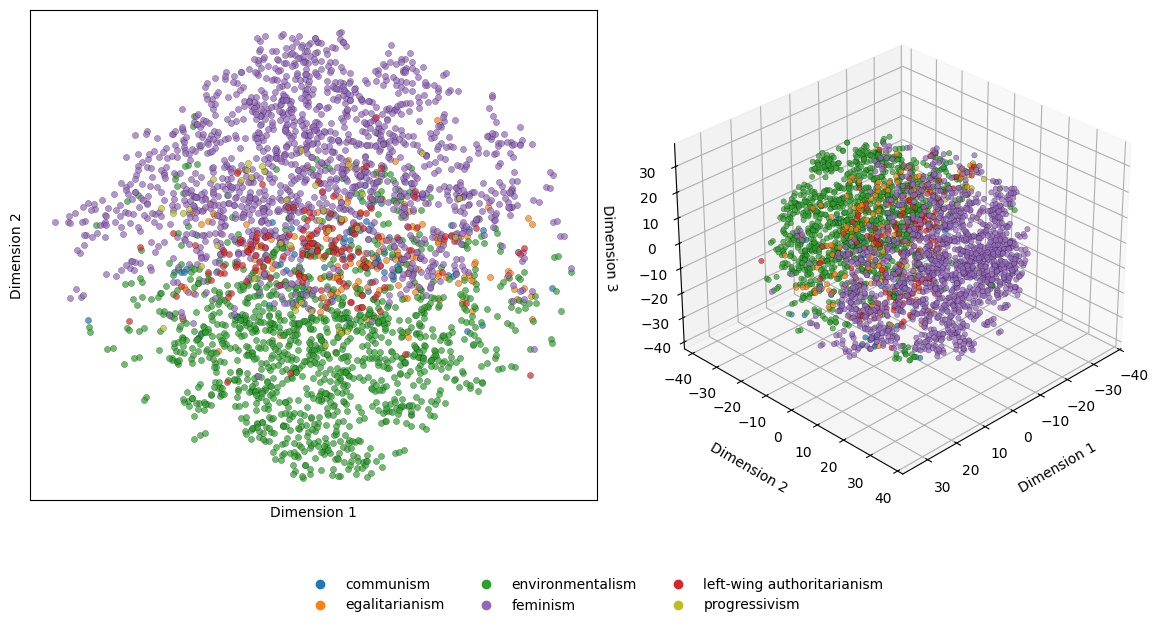

In [ ]:
from modules.clustering import plot_embedding_2d_3d


my_palette = {
    'communism': '#1f77b4',
    'egalitarianism': '#ff7f0e',
    'environmentalism': '#2ca02c',
    'feminism': '#9467bd',
    'left-wing authoritarianism': '#d62728',
    'progressivism': '#bcbd22',
    'political orientation': '#17becf',
    'ideology': '#8c564b',
}

clust_df = plot_embedding_2d_3d(
    df=items_df.query('Category not in @excluded'),
    embedding_col='qwen_embeddings_raw',
    prep_reducer='umap',
    category_col='Category',
    palette_name='tab20c',          # fallback
    category_palette=my_palette,    # custom map
    cluster_method='kmeans',
    viz_reducer='tsne',
    random_state=55,
    elev=30, azim=45,
    outlier_pct=99.0
)

### Evolution 

/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


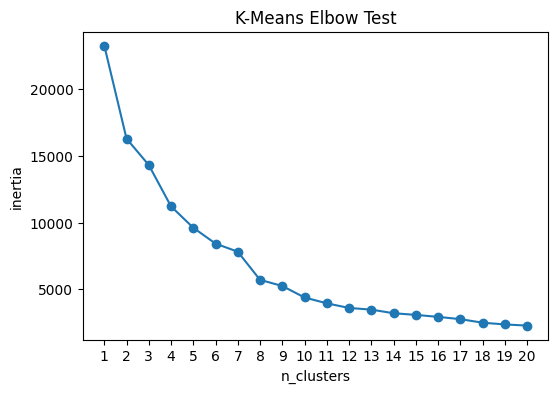

/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


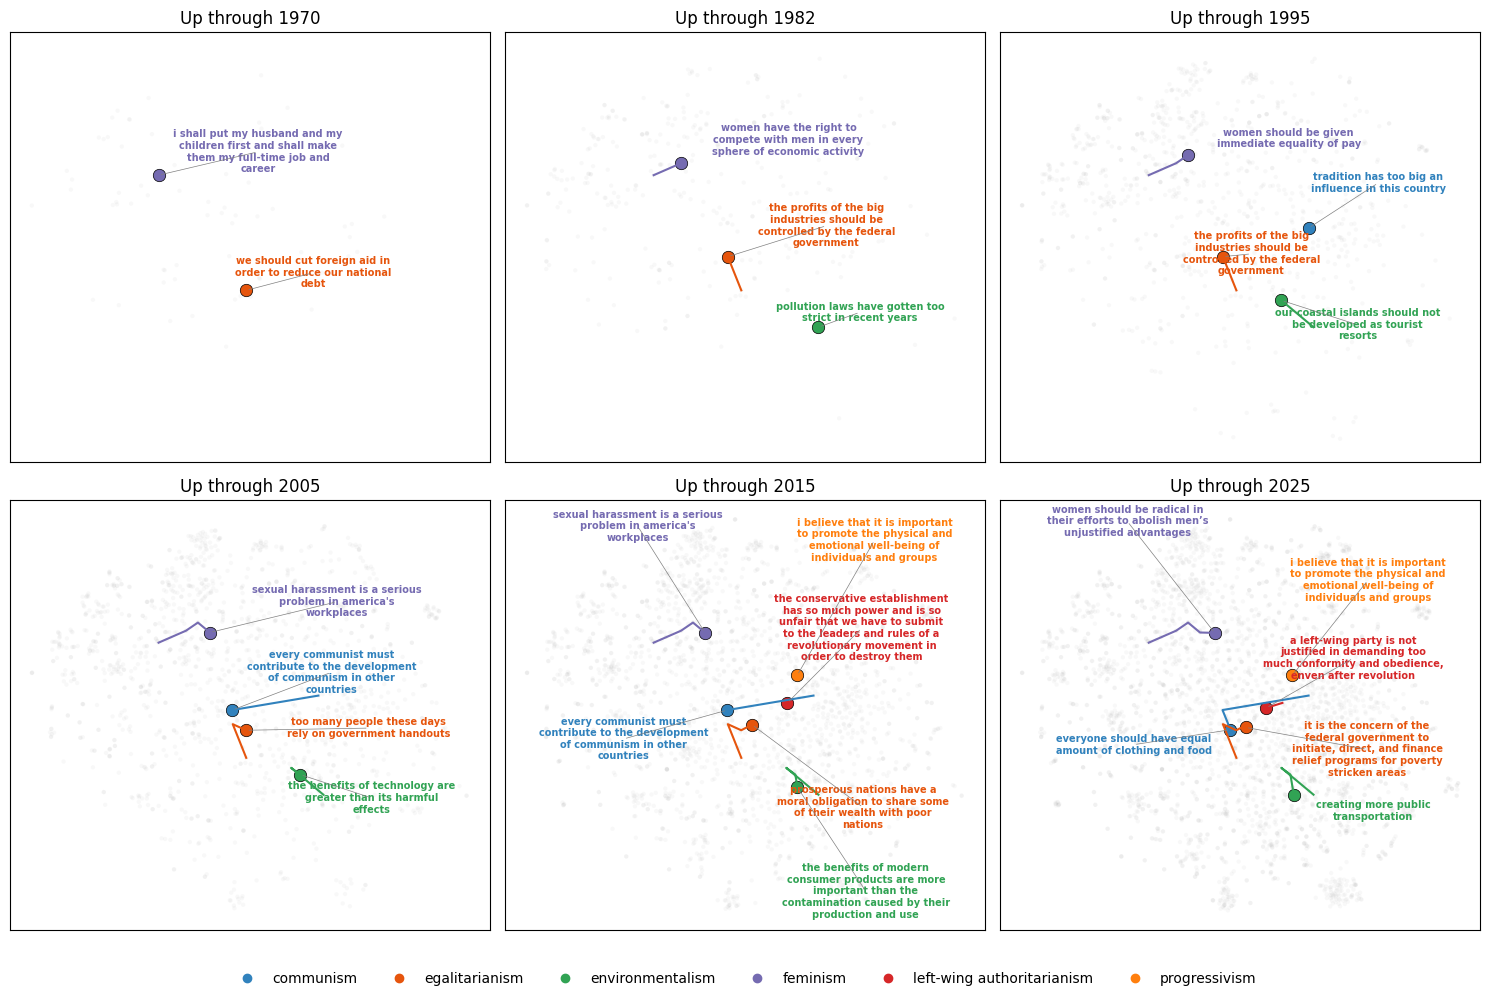

,Author,Document title,Abstract,Year,Original scale name,Category,Item content,tokens,tokens_nouns,tokens_nouns__unique,qwen_embeddings,qwen_embeddings_raw,group,cluster,dim1,dim2
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990.0,FEM scale,feminism,women have the right to compete with men in ev...,"[woman, right, compete, man, sphere, activity]","[woman, right, man, sphere, activity]",woman sphere right activity man,"[5.537450790405273, 1.9330693483352661, -2.597...","[0.8717906475067139, 2.3683886528015137, 0.015...",0.0,0,-19.625940,28.704899
1,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990.0,FEM scale,feminism,"as head of the household, the father should ha...","[head, household, father, final, authority, ch...","[head, household, father, final, authority, ch...",household father authority head child final,"[3.0980119705200195, 1.6093477010726929, 0.700...","[2.6022112369537354, 0.002913000527769327, 1.8...",0.0,0,-38.448914,13.791899
2,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990.0,FEM scale,feminism,the unmarried mother is morally a greater fail...,"[unmarried, mother, morally, great, failure, u...","[unmarried, mother, great, failure, unmarried,...",mother failure great father unmarried,"[1.838101863861084, 4.485133647918701, -1.8118...","[2.813599109649658, 1.590532898902893, 0.45868...",0.0,0,-44.206772,27.570227
3,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990.0,FEM scale,feminism,a woman who refuses to give up her job to move...,"[woman, refuse, give, job, move, husband, woul...","[woman, job, husband, marriage]",woman marriage husband job,"[3.1510119438171387, 2.8126323223114014, 2.854...","[0.4250686466693878, 0.8295471668243408, -0.04...",0.0,0,-46.861782,42.242393
4,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990.0,FEM scale,feminism,a woman who refuses to bear children has faile...,"[woman, refuse, bear, child, fail, duty, husband]","[woman, child, duty, husband]",woman husband duty child,"[4.0924506187438965, 0.9961591958999634, 1.262...","[1.5195868015289307, 0.43857425451278687, 3.62...",0.0,0,-43.271210,35.478237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,"Proulx, T., Costin, V., Magazin, E., Zarzeczna...",The Progressive Values Scale: Assessing the Id...,NaN,2022.0,NaN,progressivism,"if you’re part of a historical majority, it’s ...","[part, historical, majority, disrespectful, ad...","[part, historical, majority, disrespectful, cu...",group custom majority disrespectful culture pa...,"[0.6151881217956543, 2.360611915588379, -1.673...","[3.5421886444091797, 2.046027660369873, -0.365...",0.0,1,14.229767,12.605859
3126,"Proulx, T., Costin, V., Magazin, E., Zarzeczna...",The Progressive Values Scale: Assessing the Id...,NaN,2022.0,NaN,progressivism,taking on the culture of minority groups (musi...,"[take, culture, minority, group, music, fashio...","[culture, minority, group, music, fashion, act...",group entitlement fashion music culture act mi...,"[2.281083583831787, 4.9683990478515625, 1.6411...","[1.3415967226028442, 1.769961953163147, 2.3607...",0.0,1,7.715157,12.581175
3127,"Proulx, T., Costin, V., Magazin, E., Zarzeczna...",The Progressive Values Scale: Assessing the Id...,NaN,2022.0,NaN,progressivism,those who have crossed a moral line can better...,"[cross, moral, line, well, understand, magnitu...","[moral, line, magnitude, mistake]",mistake line moral magnitude,"[1.5898370742797852, 0.8647077083587646, -0.34...","[-1.5992977619171143, 1.526310682296753,

In [ ]:
from modules.evolution import plot_category_evolution


excluded = ['political orientation','ideology']

plot_category_evolution(
    df=items_df.query('Category not in @excluded'),
    year_column='Year',
    embedding_column='qwen_embeddings_raw',
    text_column='Item content',
    category_column='Category',
    cutoff_years=[1970,1982,1995,2005,2015,2025],
    mode='cumulative',
    window=5,
    prep_reducer='umap',
    pca_components=50,
    cluster_method='kmeans',
    plot_elbow=True,
    elbow_range=(1,20),
    cluster_kwargs={'n_clusters':8},
    viz_reducer='tsne',
    viz_kwargs={'perplexity':30,'n_iter':1000},
    random_state=55,
    palette_name='tab20c',
    cols=3,
    figsize_per_plot=(5,5),
    point_alpha=0.05,
    centroid_size=80,
    show_labels=True,
    file_title="cumulative"
)

### Network

In [ ]:
from modules.network import build_df_pairs


years = [1950,1960,1970,1980,1990,2000,2010,2020,2025]
df_pairs = build_df_pairs(
    items_df,
    year_column='Year',
    category_column='Category',
    embedding_column='qwen_embeddings_raw',
    years=[2025]
)

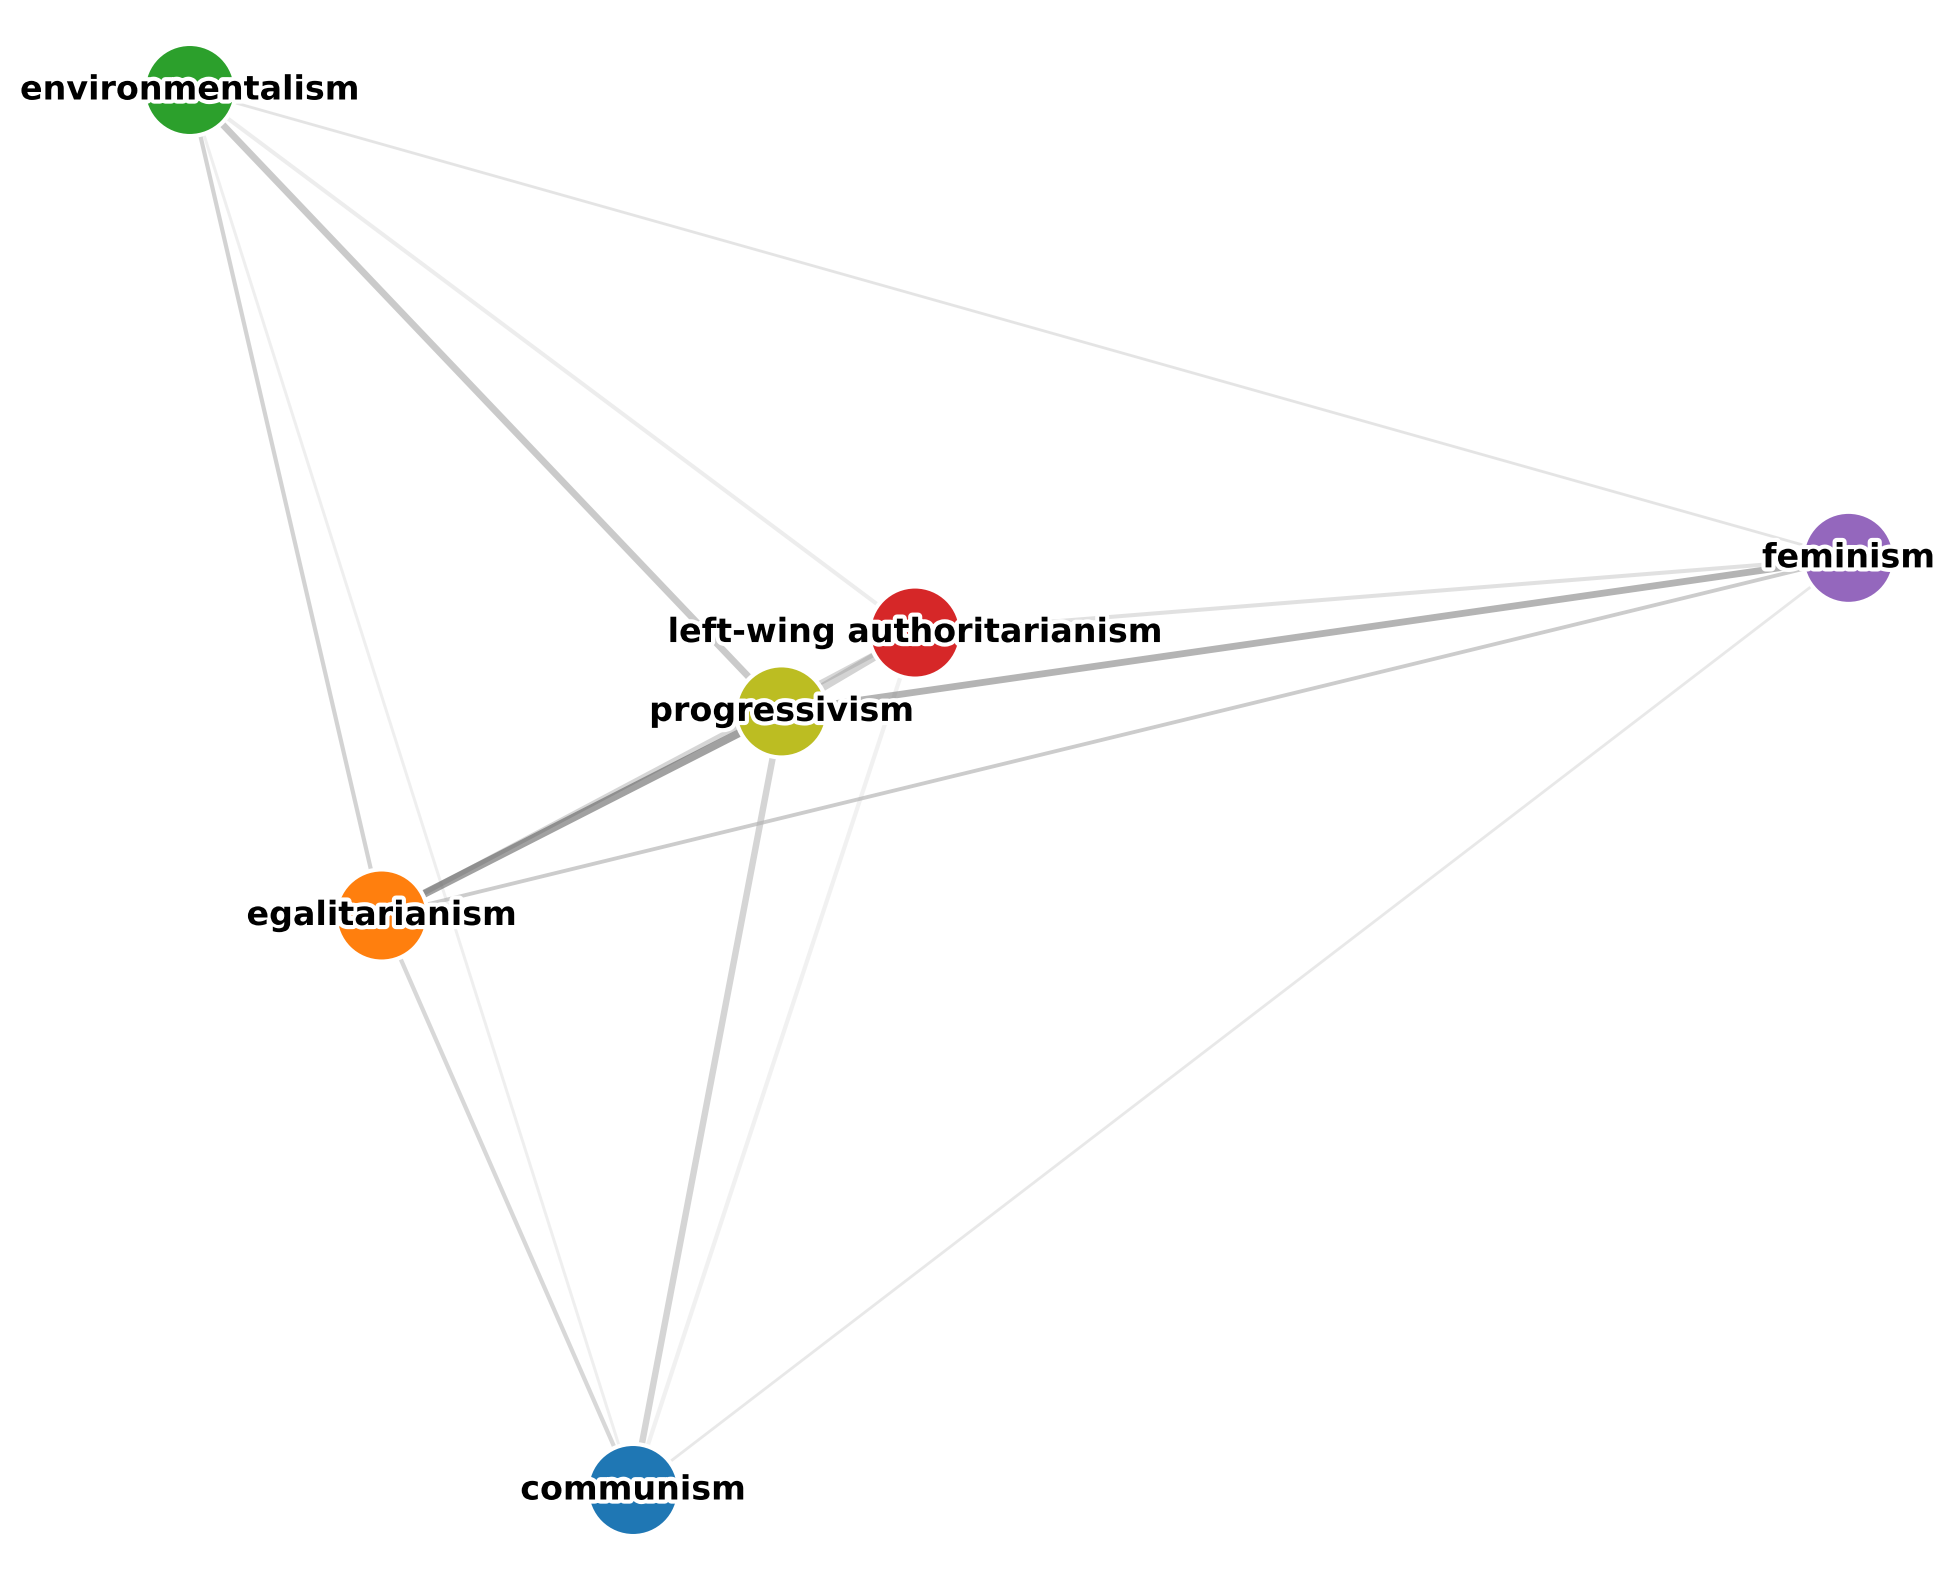

In [255]:

from modules.network import plot_category_network_3d


my_palette = {
    'communism':                 '#1f77b4',  # blue  
    'egalitarianism':            '#ff7f0e',  # orange
    'environmentalism':          '#2ca02c',  # green
    'feminism':                  '#9467bd',  # purple
    'left-wing authoritarianism':'#d62728',  # red
    'progressivism':             '#bcbd22',  # mustard yellow

}
extra_colors = {
    'political orientation': '#17becf',  # teal-cyan
    'ideology':               '#8c564b',  # warm brown
}

my_palette.update(extra_colors)



plot_category_network_3d(
    df_pairs.query('Cat1 not in @excluded_categories').query('Cat2 not in @excluded_categories'),
    year=None,
    top_n_edges=999,
    gamma=1.,
    Z0=3.,
    category_palette=my_palette,
    cmap_name='OrRd',
    edge_width=1.0,
    show_labels=True,
    grayscale_edges=True
)




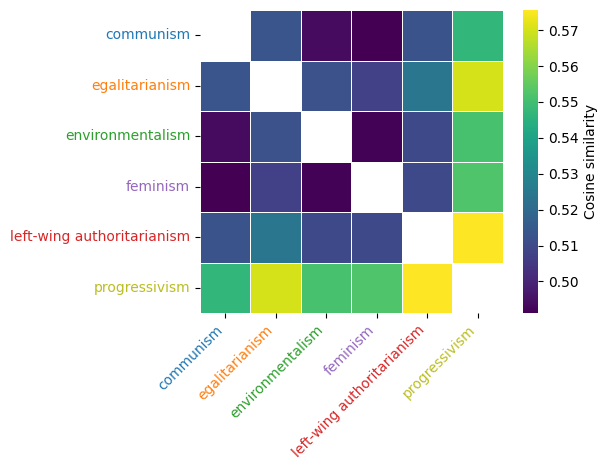

In [ ]:
# If you want the latest year in df_pairs:
from modules.network import plot_category_similarity_heatmap_from_pairs


latest_year = int(df_pairs["Year"].max())

order = ["communism","egalitarianism","environmentalism","feminism",
         "left-wing authoritarianism","progressivism"]

plot_category_similarity_heatmap_from_pairs(
    df_pairs=df_pairs.query('Cat1 not in @excluded_categories and Cat2 not in @excluded_categories'),
    year=latest_year,
    cat1_col="Cat1",
    cat2_col="Cat2",
    sim_col="Overlap",
    order=order,
    palette=my_palette,
    cmap="viridis",
    figsize=(6.2, 4.8),
    save_path="figures/category_similarity_heatmap.png",
)


### Finding categories within major groups

In [ ]:
from modules.clustering import plot_cumulative_embedding_pipeline

/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


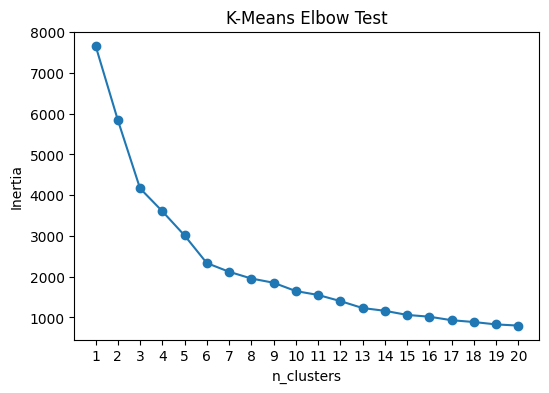

Clustering metrics:
 • Silhouette Score:        0.356
 • Calinski–Harabasz Score: 594.3
 • Davies–Bouldin Score:    0.970


/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


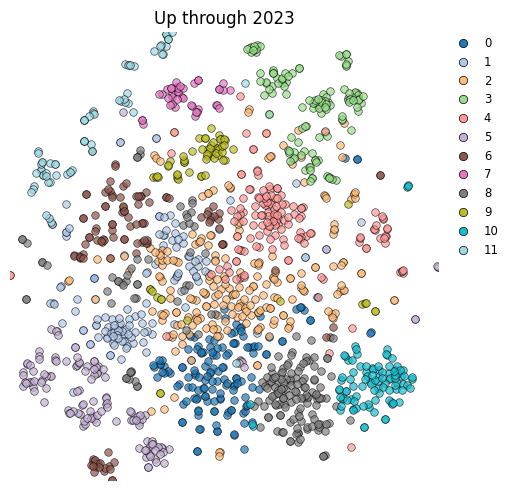

In [ ]:
clustered_fem = plot_cumulative_embedding_pipeline(
    df=items_df.query('Category == "feminism"'),
    embedding_col='qwen_embeddings_raw',
    category_col=None,
    years_to_plot=[2023],
    prep_reducer='umap',
    pca_components=100,
    prep_kwargs={'n_neighbors':15,'min_dist':0.1},
    cluster_method='kmeans',
    cluster_kwargs={'n_clusters':12},
    plot_elbow=True,               # <-- run elbow from k=1 to 10
    elbow_range=(1,20),
    viz_reducer='tsne',
    viz_kwargs={'perplexity':30,'n_iter':1000},
    random_state=42,
    legend=True,
    wider_legend=False,
    point_size=30,
    point_alpha=0.7,
    point_edgecolor='black',            
    point_edgewidth=0.5,                
    outline_mode='edge',          
)

In [90]:
clustered_fem

,Author,Document title,Abstract,Year,Original scale name,Category,Item content,tokens,tokens_nouns,tokens_nouns__unique,qwen_embeddings,qwen_embeddings_raw,group,cluster,dim1,dim2
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,women have the right to compete with men in ev...,"[woman, right, compete, man, sphere, activity]","[woman, right, man, sphere, activity]",woman sphere right activity man,"[5.537450790405273, 1.9330693483352661, -2.597...","[0.8717906475067139, 2.3683886528015137, 0.015...",0.0,2,-24.785065,5.119304
1,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,"as head of the household, the father should ha...","[head, household, father, final, authority, ch...","[head, household, father, final, authority, ch...",household father authority head child final,"[3.0980119705200195, 1.6093477010726929, 0.700...","[2.6022112369537354, 0.002913000527769327, 1.8...",0.0,1,-21.909346,-11.725376
2,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,the unmarried mother is morally a greater fail...,"[unmarried, mother, morally, great, failure, u...","[unmarried, mother, great, failure, unmarried,...",mother failure great father unmarried,"[1.838101863861084, 4.485133647918701, -1.8118...","[2.813599109649658, 1.590532898902893, 0.45868...",0.0,5,-32.453213,-14.397433
3,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to give up her job to move...,"[woman, refuse, give, job, move, husband, woul...","[woman, job, husband, marriage]",woman marriage husband job,"[3.1510119438171387, 2.8126323223114014, 2.854...","[0.4250686466693878, 0.8295471668243408, -0.04...",0.0,11,2.816578,-17.943338
4,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to bear children has faile...,"[woman, refuse, bear, child, fail, duty, husband]","[woman, child, duty, husband]",woman husband duty child,"[4.0924506187438965, 0.9961591958999634, 1.262...","[1.5195868015289307, 0.43857425451278687, 3.62...",0.0,5,-42.345718,-22.046432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,"Vernet, Jean-Pierre;Vala, Jorge;AmÃ¢ncio, Ligi...",Conscientization of social cryptomnesia reduce...,This paper develops a hypothesis concerning th...,2009,attitude toward women's rights,feminism,do you think you are in favor of women’s right...,"[think, favor, woman, right, access, high, edu...","[favor, woman, right, high, education]",woman right favor education high,"[4.250711441040039, -0.8842358589172363, -1.58...","[2.0558531284332275, -0.7545461058616638, 0.87...",0.0,3,14.345543,44.952820
1466,"de Lemus, Soledad;Bukowski, Marcin;Spears, Rus...",Reactance to (or acceptance of) stereotypes: I...,We propose that reactance to threats to indivi...,2015,identification scale,feminism,i identify with this group,"[identify, group]",[group],group,"[1.0545562505722046, 1.043185830116272, -0.585...","[1.0999428033828735, 2.2033426761627197, 0.369...",0.0,0,17.119181,-5.648721
1467,"de Lemus, Soledad;Bukowski, Marcin;Spears, Rus...",Reactance to (or acceptance of) stereotypes: I...,We propose that reactance to threats to indivi...,2015,identification scale,feminism,i have strong ties with this group,"[strong, tie, group]","[strong, tie, group]",tie strong group,"[1.30893874168396, -0.4090699851512909, 1.8623...","[0.5689088702201843, 1.3240864276885986, 0.954...",0.0,0,17.050295,-5.686051
1468,"de Lemus, Soledad;Bukowski, 

In [93]:

bows = {}
N = 30
for cluster in clustered_fem['cluster'].unique():
    _ = clustered_fem.query('cluster == @cluster')
    voc = Counter(_['tokens_nouns'].sum()).most_common()
    bows[cluster] = voc
    # Extract the top N words and their frequencies for the current cluster
    top_words = dict(voc[:N])
    print('------ \n Cluster: ', cluster)
    print('top words: \n', top_words)
    print('------')
    try:
        print(_.sample(100)['Item content'].values)
    except:
        print(_['Item content'].values)
    print('------')

------ 
 Cluster:  2
top words: 
 {'woman': 164, 'man': 62, 'right': 20, 'feminist': 20, 'society': 14, 'equal': 13, 'government': 12, 'power': 12, 'group': 10, 'male': 10, 'much': 10, 'way': 10, 'role': 9, 'issue': 8, 'business': 8, 'movement': 7, 'social': 7, 'female': 7, 'law': 7, 'people': 7, 'many': 7, 'activity': 6, 'family': 6, 'husband': 6, 'candidate': 6, 'church': 6, 'view': 5, 'problem': 5, 'child': 5, 'sex': 5}
------
['society has reached the point where women and men have equal opportunities for achievement'
 'commercials emphasizing a positive image of women should be subsidized and aired as public service announcements'
 'i believe that being a woman has caused me to have many strengths'
 'career women tend to be masculine and domineering'
 'women should not be in government because they are too emotional'
 'How do you think the aims of the WLM will affect men? Men will be liberated as well as women Women’s liberation will not necessarily affect men Women’s liberation w

/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


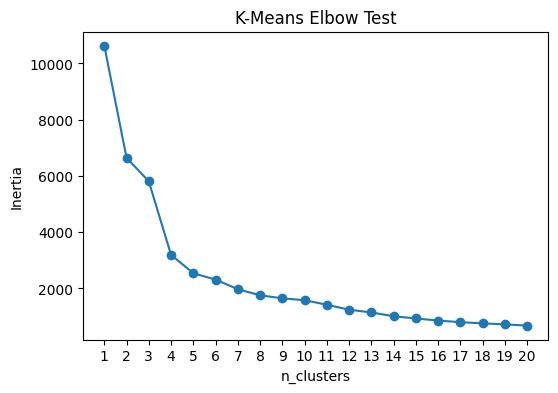

Clustering metrics:
 • Silhouette Score:        0.319
 • Calinski–Harabasz Score: 783.9
 • Davies–Bouldin Score:    1.090


/Users/ezequiellopez/.pyenv/versions/polviewnet/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


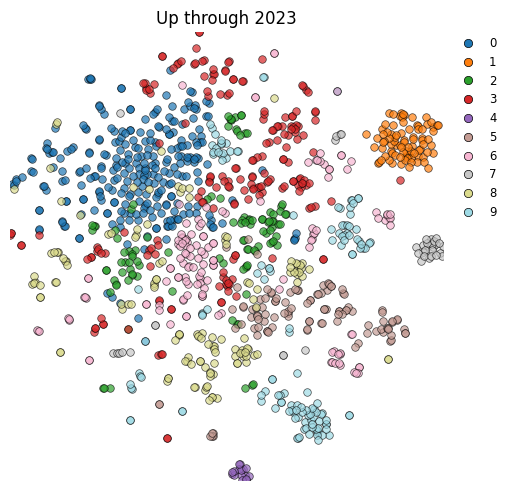

In [95]:
clustered_env = plot_cumulative_embedding_pipeline(
    df=items_df.query('Category == "environmentalism"'),
    embedding_col='qwen_embeddings_raw',
    category_col=None,
    years_to_plot=[2023],
    prep_reducer='umap',
    pca_components=100,
    prep_kwargs={'n_neighbors':15,'min_dist':0.1},
    cluster_method='kmeans',
    cluster_kwargs={'n_clusters':10},
    plot_elbow=True,               # <-- run elbow from k=1 to 10
    elbow_range=(1,20),
    viz_reducer='tsne',
    viz_kwargs={'perplexity':30,'n_iter':1000},
    random_state=42,
    legend=True,
    wider_legend=False,
    point_size=30,
    point_alpha=0.7,
    point_edgecolor='black',            
    point_edgewidth=0.5,                
    outline_mode='edge',              
)

In [96]:

bows = {}
N = 30
for cluster in clustered_env['cluster'].unique():
    _ = clustered_env.query('cluster == @cluster')
    voc = Counter(_['tokens_nouns'].sum()).most_common()
    bows[cluster] = voc
    # Extract the top N words and their frequencies for the current cluster
    top_words = dict(voc[:N])
    print('------ \n Cluster: ', cluster)
    print('top words: \n', top_words)
    print('------')
    try:
        print(_.sample(100)['Item content'].values)
    except:
        print(_['Item content'].values)
    print('------')

------ 
 Cluster:  0
top words: 
 {'nature': 39, 'human': 28, 'people': 26, 'environmental': 21, 'energy': 21, 'environment': 20, 'natural': 16, 'thing': 15, 'problem': 15, 'pollution': 14, 'world': 13, 'society': 13, 'good': 11, 'right': 11, 'need': 11, 'nuclear': 11, 'animal': 10, 'important': 9, 'plant': 9, 'government': 9, 'renewable': 9, 'fuel': 9, 'area': 8, 'power': 8, 'idea': 8, 'use': 8, 'system': 8, 'change': 8, 'economic': 7, 'balance': 7}
------
['our society would improve very much, if people were to return to a life in small natural communities and take care for their own maintenance'
 'human development is always a struggle against nature: it or us'
 'if local government policy went counter to my views, i would quit'
 'water pollution in a nearby stream'
 'it is important to [him/her] that there is no war or conflict'
 'people who say that the unrelenting exploitation of nature has driven us to the brink of ecological collapse are wrong'
 'constructing new dams'
 'energy

### Build taxonomy

At this point, we want to run a prompt-engineered approach to classify elements into defined categories. This is being achieved through the script 'classify.py' and using the specific prompt for 'feminism' or 'environmentalism', respectively

In [231]:

from modules.building_taxonomy import load_joblib_responses, merge_responses_with_dataframe


environmental_main_categories = [
    "Nature & Human Relationship",
    "Technology & Development",
    "Policy & Governance",
    "Personal Identity & Responsibility",
    "Environmental Threat Perception",
    "Consumption & Materialism",
    "Intergenerational & Future Orientation"
]

feminism_main_categories = [
    "Workplace & Economic Equality",
    "Gender Roles & Domesticity",
    "Feminist Identity & Movement Engagement",
    "Political & Civic Representation",
    "Structural & Systemic Critique",
    "Reproductive Rights & Sexual Autonomy",
    "Gender Stereotypes & Cultural Norms",
    "Anti-Feminist / Backlash Attitudes"
]

df_fem = pd.read_csv("data/feminism__clustered_v1.csv")
df_env = pd.read_csv("data/environmentalism__clustered_v1.csv")

# Set the folders containing joblib files
folder_fem = "data/20250713_feminism_llama_v1"
folder_env = "data/20250713_environmentalism_llama_v1"

# Load joblib responses for feminism and environmentalism
response_map_fem = load_joblib_responses(folder_fem)
response_map_env = load_joblib_responses(folder_env)

# Merge responses with original DataFrames
df_combined_fem = merge_responses_with_dataframe(
    df_fem, response_map_fem, column_name="AI_Response"
)[['Author', 'Document title', 'Year', 'Original scale name', 'Category', 'Item content', 'AI_Response']]

df_combined_env = merge_responses_with_dataframe(
    df_env, response_map_env, column_name="AI_Response"
)[['Author', 'Document title', 'Year', 'Original scale name', 'Category', 'Item content', 'AI_Response']]


In [ ]:

# # Save to new Excel files
# output_path_fem = "classification_feminism_v1.xlsx"
# output_path_env = "classification_environmentalism_v1.xlsx"

# df_combined_fem.to_excel(output_path_fem, index=False)
# print(f"Saved merged feminism dataset to: {output_path_fem}")

# df_combined_env.to_excel(output_path_env, index=False)
# print(f"Saved merged environmentalism dataset to: {output_path_env}")

Saved merged feminism dataset to: classification_feminism_v1.xlsx
Saved merged environmentalism dataset to: classification_environmentalism_v1.xlsx


In [232]:
df_combined_env['Main Category'] = df_combined_env['AI_Response'].apply(lambda s: [l for l in environmental_main_categories if l in s] )
df_combined_env["n_classes"] = df_combined_env['Main Category'].apply(len)
df_combined_env["n_classes"].value_counts()

n_classes
1    1225
0      26
2       6
Name: count, dtype: int64

In [249]:
df_combined_fem['Main Category'] = df_combined_fem['AI_Response'].apply(lambda s: [l for l in feminism_main_categories if l in s] )
df_combined_fem["n_classes"] = df_combined_fem['Main Category'].apply(len)
df_combined_fem["n_classes"].value_counts()

n_classes
1    1441
0      33
2       6
4       1
Name: count, dtype: int64

In [250]:
# Build a dict of representative item -> main category
item_to_main_category = dict(
    zip(df_combined_env['Item content'], df_combined_env['Main Category'])
)

# Flatten: every (string) variant gets the same main category as its representative
maincat_map = {}
for rep_item, main_cat in item_to_main_category.items():
    variants = map_content.get(rep_item, [])
    for v in [rep_item, *variants]:
        if isinstance(v, str):                  # skip lists/tuples etc.
            maincat_map.setdefault(v, main_cat) # keep first assignment if duplicates collide

# Assign to the environmental slice
extended_items_df__env = items_df_.query('Category == "environmentalism"')
extended_items_df__env['Main Category'] = (
    extended_items_df__env['Item content'].map(maincat_map)
)


/var/folders/5c/0z4syy0s0ks9ssb607wqz7vh0000gn/T/ipykernel_17790/2566238323.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extended_items_df__env['Main Category'] = (


In [251]:
# Build a dict of representative item -> main category
item_to_main_category = dict(
    zip(df_combined_fem['Item content'], df_combined_fem['Main Category'])
)

# Flatten: every (string) variant gets the same main category as its representative
maincat_map = {}
for rep_item, main_cat in item_to_main_category.items():
    variants = map_content.get(rep_item, [])
    for v in [rep_item, *variants]:
        if isinstance(v, str):                  # skip lists/tuples etc.
            maincat_map.setdefault(v, main_cat) # keep first assignment if duplicates collide

# Assign to the environmental slice
extended_items_df__fem = items_df_.query('Category == "feminism"')
extended_items_df__fem['Main Category'] = (
    extended_items_df__fem['Item content'].map(maincat_map)
)


/var/folders/5c/0z4syy0s0ks9ssb607wqz7vh0000gn/T/ipykernel_17790/835620523.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extended_items_df__fem['Main Category'] = (


In [252]:
extended_items_df__fem

,Author,Document title,Abstract,Year,Original scale name,Category,Item content,tokens,tokens_nouns,tokens_nouns__unique,Main Category
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,women have the right to compete with men in ev...,"[woman, right, compete, man, sphere, activity]","[woman, right, man, sphere, activity]",woman sphere right activity man,[Workplace & Economic Equality]
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,"as head of the household, the father should ha...","[head, household, father, final, authority, ch...","[head, household, father, final, authority, ch...",household father authority head child final,[Gender Roles & Domesticity]
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,the unmarried mother is morally a greater fail...,"[unmarried, mother, morally, great, failure, u...","[unmarried, mother, great, failure, unmarried,...",mother failure great father unmarried,[Gender Stereotypes & Cultural Norms]
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to give up her job to move...,"[woman, refuse, give, job, move, husband, woul...","[woman, job, husband, marriage]",woman marriage husband job,[Gender Roles & Domesticity]
0,"Hutchinson, Roger L.;Schechterman, Andrew L.",Perceived impact of the women's movement: View...,Results of questionnaires administered to 99 f...,1990,FEM scale,feminism,a woman who refuses to bear children has faile...,"[woman, refuse, bear, child, fail, duty, husband]","[woman, child, duty, husband]",woman husband duty child,[Gender Roles & Domesticity]
...,...,...,...,...,...,...,...,...,...,...,...
1194,"Twenge, J.M.",Mapping gender: The Multifactorial Approach an...,NaN,1999,attitudes toward woman scale (AWS),feminism,economic and social freedom is worth far more ...,"[economic, social, freedom, worth, far, woman,...","[economic, social, freedom, worth, woman, acce...",woman economic worth femininity social man acc...,[Structural & Systemic Critique]
1194,"Twenge, J.M.",Mapping gender: The Multifactorial Approach an...,NaN,1999,attitudes toward woman scale (AWS),feminism,"on the average, women should be regarded as le...","[average, woman, regard, less, capable, contri...","[average, woman, capable, economic, production...",woman capable economic production man average,[Workplace & Economic Equality]
1194,"Twenge, J.M.",Mapping gender: The Multifactorial Approach an...,NaN,1999,attitudes toward woman scale (AWS),feminism,there are many jobs in which men should be giv...,"[many, job, man, give, preference, woman, hire...","[many, job, man, preference, woman]",preference woman job many man,[Workplace & Economic Equality]
1194,"Twenge, J.M.",Mapping gender: The Multifactorial Approach an...,NaN,1999,attitudes toward woman scale (AWS),feminism,women should be given equal opportunity with m...,"[woman, give, equal, opportunity, man, apprent...","[woman, equal, opportunity, man, apprenticeshi...",woman apprenticeship trade various equal oppor...,[Workplace & Economic Equality]


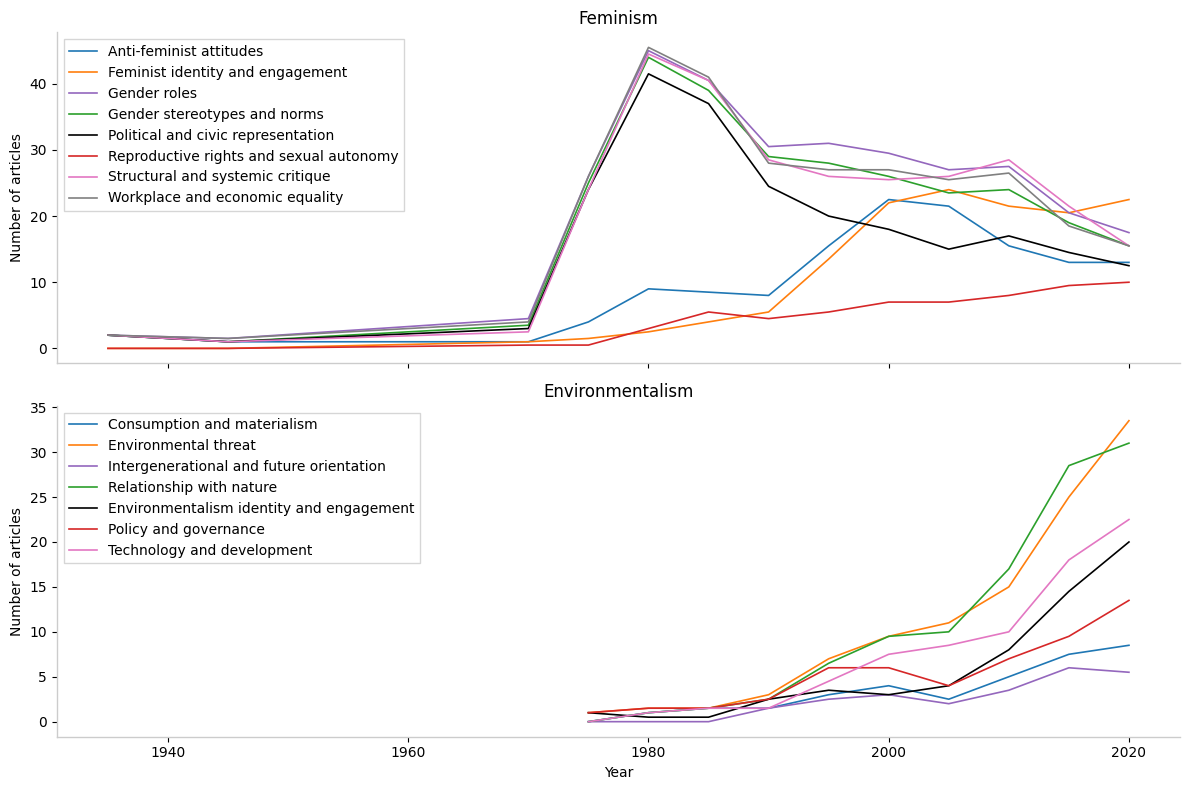

This function builds two time series panels. In each, it bins years into fixed-size windows, counts how many unique documents in each window had at least one item from each category, optionally normalizes by total unique documents in that window to get a share, optionally makes the counts cumulative (if not normalizing), and optionally smooths with a rolling mean. Then it plots the category curves for dataset 1 (top) and dataset 2 (bottom), with consistent styling and optional category renaming/ordering.


In [ ]:
from modules.tracking_subclasses import plot_two_prevalence_panels


config_fem = {
    "year_col": "Year",
    "cat_col": "Main Category",
    "doc_id_col": "Document title",
    "rename_dict": {
        'Anti-Feminist / Backlash Attitudes': 'Anti-feminist attitudes',
        'Feminist Identity & Movement Engagement': 'Feminist identity and engagement',
        'Gender Roles & Domesticity': 'Gender roles',
        'Gender Stereotypes & Cultural Norms': 'Gender stereotypes and norms',
        'Political & Civic Representation': 'Political and civic representation',
        'Reproductive Rights & Sexual Autonomy': 'Reproductive rights and sexual autonomy',
        'Structural & Systemic Critique': 'Structural and systemic critique',
        'Workplace & Economic Equality': 'Workplace and economic equality',
    },
    "category_order": [
        "Anti-feminist attitudes",
        "Feminist identity and engagement",
        "Gender roles",
        "Gender stereotypes and norms",
        "Political and civic representation",
        "Reproductive rights and sexual autonomy",
        "Structural and systemic critique",
        "Workplace and economic equality"
    ]
}
 
config_env = {
    "year_col": "Year",
    "cat_col": "Main Category",
    "doc_id_col": "Document title",
    "rename_dict": {
        "Nature & Human Relationship": "Relationship with nature",
        "Technology & Development": "Technology and development",
        "Policy & Governance": "Policy and governance",
        "Personal Identity & Responsibility": "Environmentalism identity and engagement",
        "Environmental Threat Perception": "Environmental threat",
        "Consumption & Materialism": "Consumption and materialism",
        "Intergenerational & Future Orientation": "Intergenerational and future orientation"
    },
    "category_order": [
        "Consumption and materialism",
        "Environmental threat",
        "Intergenerational and future orientation",
        "Relationship with nature",
        "Environmentalism identity and engagement",
        "Policy and governance",
        "Technology and development"
    ]
}

plot_two_prevalence_panels(
    df1=extended_items_df__fem,
    df2=extended_items_df__env,
    config1=config_fem,
    config2=config_env,
    window_size=5,
    normalize=False,
    cumulative=False,
    smooth=True,
    style="default",
    titles=("Feminism", "Environmentalism"),
    figsize=(12, 8),
    save_path="themes_per_category__raw.png"
)


This function builds two time series panels. In each, it bins years into fixed-size windows, counts how many unique documents in each window had at least one item from each category, optionally normalizes by total unique documents in that window to get a share, optionally makes the counts cumulative (if not normalizing), and optionally smooths with a rolling mean. Then it plots the category curves for dataset 1 (top) and dataset 2 (bottom), with consistent styling and optional category renaming/ordering.

----